In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import nest_asyncio
nest_asyncio.apply()

In [2]:
import os 
from dotenv import load_dotenv
from qa_flow import create_qa_flow
from utils import get_costs_and_durations
load_dotenv()
PROJECT_ID = "xxxxx" # LangDB project ID

True

In [29]:
from qa_flow import create_qa_flow

flow1 = create_qa_flow(
  "What does Lilian Weng say about the types of agent memory?", 
  first_model="gpt-4o", 
  second_model="gpt-4o", 
  tags="experiment=single"  
)
flow1.plot()

2025-01-20 19:06:02,230 - 140488472923008 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


Plot saved as crewai_flow.html


In [33]:

flow2 = create_qa_flow(
  "What does Lilian Weng say about the types of agent memory?", 
  first_model="gpt-4o",
  second_model="gemini-1.5-flash-8b", 
  tags="experiment=test",
  routing_enabled = True
)


2025-01-20 19:17:16,014 - 140488472923008 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


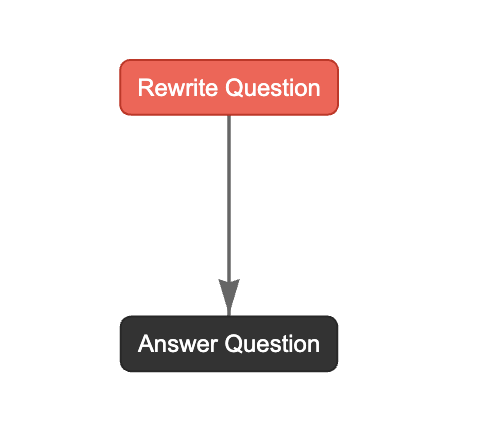

# Kicking off Flow

### Single Model Flow

In [30]:
result = flow1.kickoff()
print("=" * 10)
print(result)

# Rewriting question: What does Lilian Weng say about the types of agent memory?
What insights or opinions does Lilian Weng provide regarding the different types of memory used by agents?
# Answering question: What insights or opinions does Lilian Weng provide regarding the different types of memory used by agents?
In Lilian Weng's analysis of LLM-powered autonomous agents, memory is discussed in terms of its role in such systems. Memory types in this context are inspired by human memory categories:

1. **Sensory Memory:** It's the initial stage that retains impressions of sensory information, such as visual and auditory data, shortly after the perceptual input ends. It includes:
   - Iconic memory (visual)
   - Echoic memory (auditory)
   - Haptic memory (touch)
   Sensory memory serves as the conceptual foundation for developing embedding representations of raw inputs in agent systems.

2. **Short-Term Memory (STM) or Working Memory:** This is where information that we are currently 

### Routed Flow

In [34]:
result2 = flow2.kickoff()
print("=" * 10)
print(result2)

# Rewriting question: What does Lilian Weng say about the types of agent memory?
What are Lilian Weng's views on the different types of agent memory, and how does she categorize them?
# Answering question: What are Lilian Weng's views on the different types of agent memory, and how does she categorize them?
In Lilian Weng's views, agent memory in LLM-powered autonomous agents is categorized into short-term memory and long-term memory. Short-term memory involves all the in-context learning, utilizing the model's internal mechanisms to learn and adapt quickly for immediate tasks. Long-term memory provides agents with the capability to retain and recall vast amounts of information over extended periods. This is often achieved by leveraging an external vector store and fast retrieval systems to ensure effective memory management and recall.


In [10]:
import pandas as pd
from uuid import uuid4

questions_df = pd.read_csv("./questions.csv")
results = []
experiments = [    
    {"first_model": "gpt-4o", "second_model": "gpt-4o", "tags": "exp=single20", "routing_enabled": False},
    {"first_model": "gpt-4o", "second_model": "gemini-1.5-flash-8b", "tags": "exp=routed20", "routing_enabled": True},
]

# Iterate through each question and run experiments
for index, row in questions_df.iterrows():
    question = row["question"]  # Ensure this matches your CSV column name
    row_result = {"question": question}
    
    for config in experiments:
        # Create and execute the QA flow
        thread_id = str(uuid4())
        flow = create_qa_flow(question, config["first_model"], config["second_model"], tags=config["tags"], routing_enabled=config["routing_enabled"], thread_id=thread_id, project_id=PROJECT_ID)
        result = flow.kickoff()  
        cost_data = get_costs_and_durations(thread_id, PROJECT_ID)
        total_cost = sum(x["cost"] for x in cost_data)
        total_duration = sum(x["duration"] for x in cost_data)
        # Save the result with model and tag information
        experiment_tag = config["tags"]
        if routing_enabled:
            prefix = "routed"
        else:
            prefix = "single"
        row_result[f"{prefix}_answer"] = result
        row_result[f"{prefix}_cost"] = total_cost
        row_result[f"{prefix}_duration"] = total_duration
    
    # Append the results for the question
    results.append(row_result)

# Convert results into a DataFrame
results_df = pd.DataFrame(results)

2025-01-21 09:59:18,339 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the key components of an LLM-powered autonomous agent system?
What are the essential elements that constitute an autonomous agent system powered by large language models (LLMs)?
# Answering question: What are the essential elements that constitute an autonomous agent system powered by large language models (LLMs)?


2025-01-21 09:59:49,340 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the key components of an LLM-powered autonomous agent system?
What are the essential architectural elements and functionalities required for a robust and effective autonomous agent system powered by a large language model (LLM)?
# Answering question: What are the essential architectural elements and functionalities required for a robust and effective autonomous agent system powered by a large language model (LLM)?


2025-01-21 10:00:06,317 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How does the Chain of Thought (CoT) prompting technique enhance model performance in task decomposition?
In what ways does the Chain of Thought (CoT) prompting technique improve a model's ability to break down and solve complex tasks?
# Answering question: In what ways does the Chain of Thought (CoT) prompting technique improve a model's ability to break down and solve complex tasks?


2025-01-21 10:00:19,377 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How does the Chain of Thought (CoT) prompting technique enhance model performance in task decomposition?
How does the Chain of Thought (CoT) prompting technique improve a large language model's ability to decompose complex tasks into smaller, manageable sub-problems, leading to more accurate and reliable solutions?
# Answering question: How does the Chain of Thought (CoT) prompting technique improve a large language model's ability to decompose complex tasks into smaller, manageable sub-problems, leading to more accurate and reliable solutions?


2025-01-21 10:00:35,296 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are some examples of external tools LLMs can use to extend their capabilities, as mentioned in the documents?
What are some examples of external tools that large language models (LLMs) can utilize to enhance their capabilities, as referenced in the documents?
# Answering question: What are some examples of external tools that large language models (LLMs) can utilize to enhance their capabilities, as referenced in the documents?


2025-01-21 10:00:51,303 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are some examples of external tools LLMs can use to extend their capabilities, as mentioned in the documents?
Improved question:

What external tools can Large Language Models (LLMs) utilize to enhance their functionalities, according to the provided documents?
# Answering question: Improved question:

What external tools can Large Language Models (LLMs) utilize to enhance their functionalities, according to the provided documents?


2025-01-21 10:01:06,466 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What methods are used to enable LLMs to self-reflect and refine their outputs?
What techniques are employed to enhance large language models' ability to self-assess and improve their responses?
# Answering question: What techniques are employed to enhance large language models' ability to self-assess and improve their responses?


2025-01-21 10:01:27,942 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What methods are used to enable LLMs to self-reflect and refine their outputs?
How do large language models (LLMs) achieve self-awareness and iterative improvement in their generated text?
# Answering question: How do large language models (LLMs) achieve self-awareness and iterative improvement in their generated text?


2025-01-21 10:01:43,429 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How does few-shot learning improve performance compared to zero-shot learning in prompt engineering?
What are the advantages of few-shot learning over zero-shot learning in the context of prompt engineering?
# Answering question: What are the advantages of few-shot learning over zero-shot learning in the context of prompt engineering?


2025-01-21 10:01:57,056 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How does few-shot learning improve performance compared to zero-shot learning in prompt engineering?
How does the use of few-shot learning examples in prompt engineering affect model performance compared to relying solely on zero-shot prompts, and what are the key factors contributing to this difference?
# Answering question: How does the use of few-shot learning examples in prompt engineering affect model performance compared to relying solely on zero-shot prompts, and what are the key factors contributing to this difference?


2025-01-21 10:02:15,623 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the benefits and challenges of integrating LLMs with external APIs for problem-solving?
What are the advantages and potential difficulties of combining large language models with external APIs for enhanced problem-solving capabilities?
# Answering question: What are the advantages and potential difficulties of combining large language models with external APIs for enhanced problem-solving capabilities?


2025-01-21 10:02:29,219 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the benefits and challenges of integrating LLMs with external APIs for problem-solving?
How do the advantages and disadvantages of connecting Large Language Models (LLMs) to external APIs compare when used for solving complex problems, and what are the key factors influencing the trade-offs?
# Answering question: How do the advantages and disadvantages of connecting Large Language Models (LLMs) to external APIs compare when used for solving complex problems, and what are the key factors influencing the trade-offs?


2025-01-21 10:02:48,409 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What is the difference between short-term memory and long-term memory in LLM-based systems?
What distinguishes short-term memory from long-term memory in large language model (LLM) systems?
# Answering question: What distinguishes short-term memory from long-term memory in large language model (LLM) systems?


2025-01-21 10:02:58,702 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What is the difference between short-term memory and long-term memory in LLM-based systems?
How do short-term and long-term memory mechanisms differ in large language models (LLMs), and how do these differences affect the capabilities and limitations of LLMs?
# Answering question: How do short-term and long-term memory mechanisms differ in large language models (LLMs), and how do these differences affect the capabilities and limitations of LLMs?


2025-01-21 10:03:13,946 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What strategies are recommended for constructing effective in-context examples in prompt engineering?
What are the best practices for creating impactful in-context examples in prompt engineering?
# Answering question: What are the best practices for creating impactful in-context examples in prompt engineering?


2025-01-21 10:03:27,745 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What strategies are recommended for constructing effective in-context examples in prompt engineering?
How can I design effective in-context examples to improve the performance and relevance of large language models when using prompt engineering?
# Answering question: How can I design effective in-context examples to improve the performance and relevance of large language models when using prompt engineering?


2025-01-21 10:03:43,300 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How does the Tree of Thoughts (ToT) framework expand upon Chain of Thought reasoning?
In what ways does the Tree of Thoughts (ToT) framework enhance or build upon the principles of Chain of Thought reasoning?
# Answering question: In what ways does the Tree of Thoughts (ToT) framework enhance or build upon the principles of Chain of Thought reasoning?


2025-01-21 10:04:04,743 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How does the Tree of Thoughts (ToT) framework expand upon Chain of Thought reasoning?
How does the Tree of Thoughts framework improve upon Chain of Thought reasoning by structuring and expanding the reasoning process?
# Answering question: How does the Tree of Thoughts framework improve upon Chain of Thought reasoning by structuring and expanding the reasoning process?


2025-01-21 10:04:18,885 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are some proof-of-concept examples of autonomous agents powered by LLMs?
What are some examples of autonomous agents that utilize large language models as proof-of-concept demonstrations?
# Answering question: What are some examples of autonomous agents that utilize large language models as proof-of-concept demonstrations?


2025-01-21 10:04:32,230 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are some proof-of-concept examples of autonomous agents powered by LLMs?
What are some practical demonstrations of LLMs used to create autonomous agents, showcasing their capabilities and limitations?
# Answering question: What are some practical demonstrations of LLMs used to create autonomous agents, showcasing their capabilities and limitations?


2025-01-21 10:04:48,820 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How do autonomous agents handle task prioritization and resource allocation?
How do autonomous agents effectively prioritize tasks and allocate resources to optimize performance?
# Answering question: How do autonomous agents effectively prioritize tasks and allocate resources to optimize performance?


2025-01-21 10:05:11,850 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How do autonomous agents handle task prioritization and resource allocation?
How do autonomous agents determine the order of importance for tasks and allocate resources to maximize efficiency and achieve their goals?
# Answering question: How do autonomous agents determine the order of importance for tasks and allocate resources to maximize efficiency and achieve their goals?


2025-01-21 10:05:28,731 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What role does retrieval-augmented generation (RAG) play in improving LLM responses?
How does retrieval-augmented generation (RAG) enhance the quality and accuracy of responses generated by large language models (LLMs)?
# Answering question: How does retrieval-augmented generation (RAG) enhance the quality and accuracy of responses generated by large language models (LLMs)?
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the sam

2025-01-21 10:08:01,089 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What role does retrieval-augmented generation (RAG) play in improving LLM responses?
How does retrieval-augmented generation (RAG) enhance the quality and accuracy of large language model (LLM) outputs by leveraging external knowledge sources?
# Answering question: How does retrieval-augmented generation (RAG) enhance the quality and accuracy of large language model (LLM) outputs by leveraging external knowledge sources?


2025-01-21 10:08:21,942 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How can we implement effective error handling and recovery in autonomous agent systems?
What strategies can be used to enhance error handling and recovery mechanisms in autonomous agent systems?
# Answering question: What strategies can be used to enhance error handling and recovery mechanisms in autonomous agent systems?


2025-01-21 10:08:33,187 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How can we implement effective error handling and recovery in autonomous agent systems?
How can we design robust and adaptable error handling and recovery mechanisms for autonomous agents, considering the diverse potential failure modes and their impact on system goals?
# Answering question: How can we design robust and adaptable error handling and recovery mechanisms for autonomous agents, considering the diverse potential failure modes and their impact on system goals?
 Error parsing LLM output, agent will retry: I did it wrong. Invalid Format: I missed the 'Action:' after 'Thought:'. I will do right next, and don't use a tool I have already used.

If you don't need to use any more tools, you must give your best complete final answer, make sure it satisfies the expected criteria, use the EXACT format below:

Thought: I now can give a great answer
Final Answer: my best complete final answer to the task.




2025-01-21 10:09:16,677 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the best practices for designing conversational memory in multi-turn interactions?
What are the key strategies for effectively implementing conversational memory in multi-turn dialogues?
# Answering question: What are the key strategies for effectively implementing conversational memory in multi-turn dialogues?


2025-01-21 10:09:37,812 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the best practices for designing conversational memory in multi-turn interactions?
How can conversational systems effectively retain and utilize information from multiple turns to improve the quality and coherence of their responses?
# Answering question: How can conversational systems effectively retain and utilize information from multiple turns to improve the quality and coherence of their responses?


2025-01-21 10:09:53,780 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How do different routing strategies affect the performance of multi-agent LLM systems?
What impact do various routing strategies have on the efficiency and effectiveness of multi-agent large language model (LLM) systems?
# Answering question: What impact do various routing strategies have on the efficiency and effectiveness of multi-agent large language model (LLM) systems?


2025-01-21 10:10:33,788 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How do different routing strategies affect the performance of multi-agent LLM systems?
How does the choice of routing mechanism impact the efficiency and effectiveness of multi-agent large language model (LLM) systems, considering factors like communication overhead, response latency, and overall task completion time?
# Answering question: How does the choice of routing mechanism impact the efficiency and effectiveness of multi-agent large language model (LLM) systems, considering factors like communication overhead, response latency, and overall task completion time?


2025-01-21 10:10:50,001 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What techniques are used to ensure consistency in long-running autonomous agent tasks?
What methods are employed to maintain consistency in the tasks performed by autonomous agents over extended periods?
# Answering question: What methods are employed to maintain consistency in the tasks performed by autonomous agents over extended periods?


2025-01-21 10:11:10,602 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What techniques are used to ensure consistency in long-running autonomous agent tasks?
How can consistency be maintained in the execution of long-term, autonomous agent tasks?
# Answering question: How can consistency be maintained in the execution of long-term, autonomous agent tasks?


2025-01-21 10:11:27,919 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How can we implement effective feedback loops for continuous learning in autonomous agents?
What strategies can be employed to establish effective feedback loops that facilitate continuous learning in autonomous agents?
# Answering question: What strategies can be employed to establish effective feedback loops that facilitate continuous learning in autonomous agents?


2025-01-21 10:21:46,830 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How can we implement effective feedback loops for continuous learning in autonomous agents?
How can we design and implement robust, adaptable feedback mechanisms that enable autonomous agents to learn and improve their performance continuously, and how can we measure the effectiveness of these mechanisms?
# Answering question: How can we design and implement robust, adaptable feedback mechanisms that enable autonomous agents to learn and improve their performance continuously, and how can we measure the effectiveness of these mechanisms?


2025-01-21 10:22:21,774 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the key considerations for scaling autonomous agent systems?
What are the essential factors to consider when scaling autonomous agent systems for optimal performance and efficiency?
# Answering question: What are the essential factors to consider when scaling autonomous agent systems for optimal performance and efficiency?


2025-01-21 10:22:36,557 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What are the key considerations for scaling autonomous agent systems?
What are the key technical, organizational, and ethical challenges in scaling autonomous agent systems, considering factors like performance, reliability, safety, and societal impact?
# Answering question: What are the key technical, organizational, and ethical challenges in scaling autonomous agent systems, considering factors like performance, reliability, safety, and societal impact?


2025-01-21 10:23:04,672 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How do autonomous agents handle uncertainty and ambiguity in task execution?
What strategies do autonomous agents use to manage uncertainty and ambiguity during task execution?
# Answering question: What strategies do autonomous agents use to manage uncertainty and ambiguity during task execution?
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other


2025-01-21 10:24:10,403 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: How do autonomous agents handle uncertainty and ambiguity in task execution?
How do autonomous agents manage uncertainty and ambiguity during the execution of complex tasks, and what strategies are employed to mitigate potential errors or suboptimal outcomes?
# Answering question: How do autonomous agents manage uncertainty and ambiguity during the execution of complex tasks, and what strategies are employed to mitigate potential errors or suboptimal outcomes?


2025-01-21 10:24:28,635 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What methods are used to evaluate and benchmark autonomous agent performance?
What are the common techniques for assessing and comparing the performance of autonomous agents?
# Answering question: What are the common techniques for assessing and comparing the performance of autonomous agents?


2025-01-21 10:24:43,281 - 140478154541952 - __init__.py-__init__:537 - WARNING: Overriding of current TracerProvider is not allowed


# Rewriting question: What methods are used to evaluate and benchmark autonomous agent performance?
How are the performance of autonomous agents measured and compared, and what evaluation metrics and benchmarks exist?
# Answering question: How are the performance of autonomous agents measured and compared, and what evaluation metrics and benchmarks exist?
 Error parsing LLM output, agent will retry: I did it wrong. Tried to both perform Action and give a Final Answer at the same time, I must do one or the other


In [11]:
results_df

,question,exp=single22_answer,exp=single22_cost,exp=single22_duration,exp=routed22_answer,exp=routed22_cost,exp=routed22_duration
0,What are the key components of an LLM-powered ...,"In a LLM-powered autonomous agent system, the ...",0.013791,20800575.0,"In a LLM-powered autonomous agent system, the ...",0.000089,4163938.0
1,How does the Chain of Thought (CoT) prompting ...,Task Decomposition: Chain of thought (CoT; Wei...,0.003087,3211506.0,"Chain of thought (CoT) prompting, as mentioned...",0.000100,4848671.0
2,What are some examples of external tools LLMs ...,External tools that large language models (LLM...,0.003042,7009990.0,Relevant Content:\nAutonomous agents utilize a...,0.000089,5406924.0
3,What methods are used to enable LLMs to self-r...,Techniques to enhance large language models' a...,0.007647,12076728.0,Large Language Models (LLMs) achieve iterative...,0.000087,5983410.0
4,How does few-shot learning improve performance...,Few-shot learning in prompt engineering often ...,0.008019,7558176.0,"In the realm of prompt engineering, few-shot l...",0.000093,7301069.0
5,What are the benefits and challenges of integr...,Advantages of combining large language models ...,0.003114,2829015.0,Connecting Large Language Models (LLMs) to ext...,0.000096,5487784.0
6,What is the difference between short-term memo...,"In large language model (LLM) systems, memory ...",0.002664,2359363.0,In the context of large language models (LLMs)...,0.000096,4021451.0
7,What strategies are recommended for constructi...,Best practices for impactful in-context exampl...,0.002664,3043019.0,To design effective in-context examples for im...,0.000087,5845283.0
8,How does the Tree of Thoughts (ToT) framework ...,The Tree of Thoughts (ToT) framework enhances ...,0.010593,13705510.0,The Tree of Thoughts framework improves upon C...,0.000086,5033575.0
9,What are some proof-of-concept examples of aut...,Natural language serves as an interface betwee...,0.002733,2521817.0,LLM Powered Autonomous Agents\n\nIn the explor...,0.000088,4196454.0


In [8]:
from qa_flow import rate_answers, plot_cost_comparison, plot_cost_difference,calculate_total_costs, plot_cost_comparison_log, plot_cost_comparison_cover, compare_scores

In [23]:
x = rate_answers("./result20.csv", "output20.csv")

Rating answers: 100%|██████████| 11/11 [00:30<00:00,  2.77s/it]


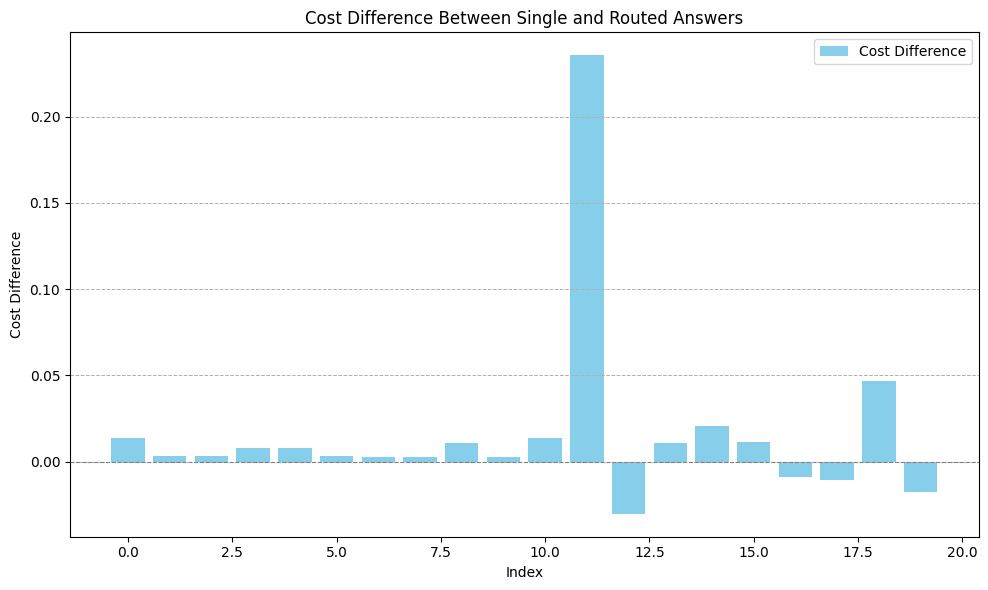

In [45]:
plot_cost_difference("./output20.csv")

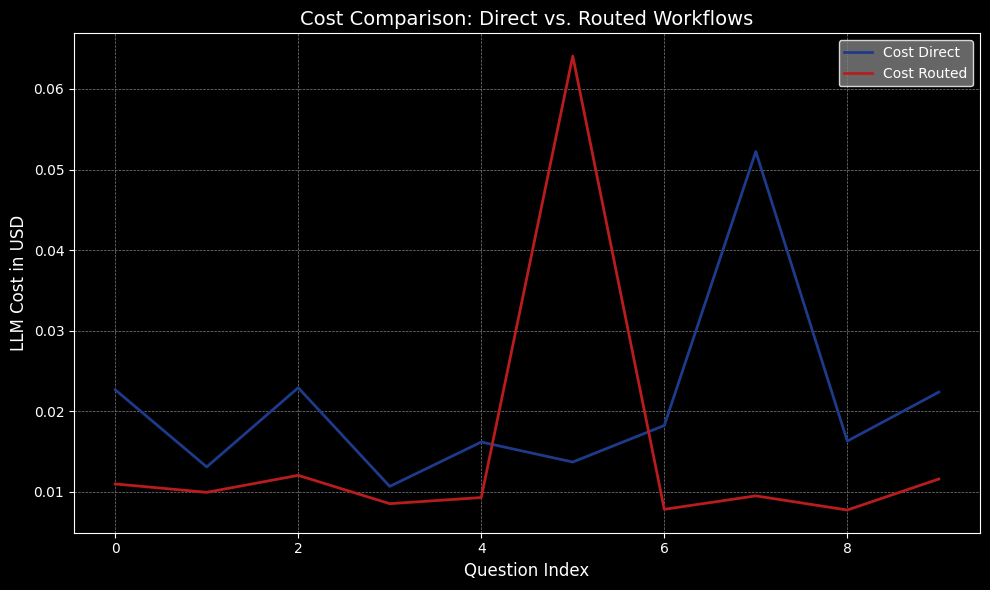

In [12]:
plot_cost_comparison("./output10.csv")

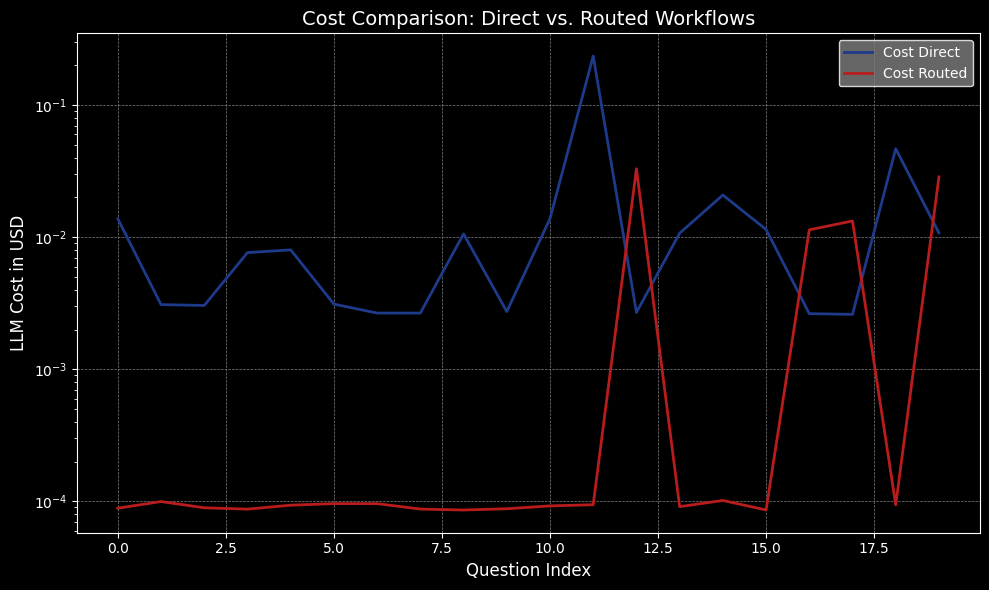

In [11]:
plot_cost_comparison_log("./output20.csv")

Plot saved as ./cover_plots_output20.png


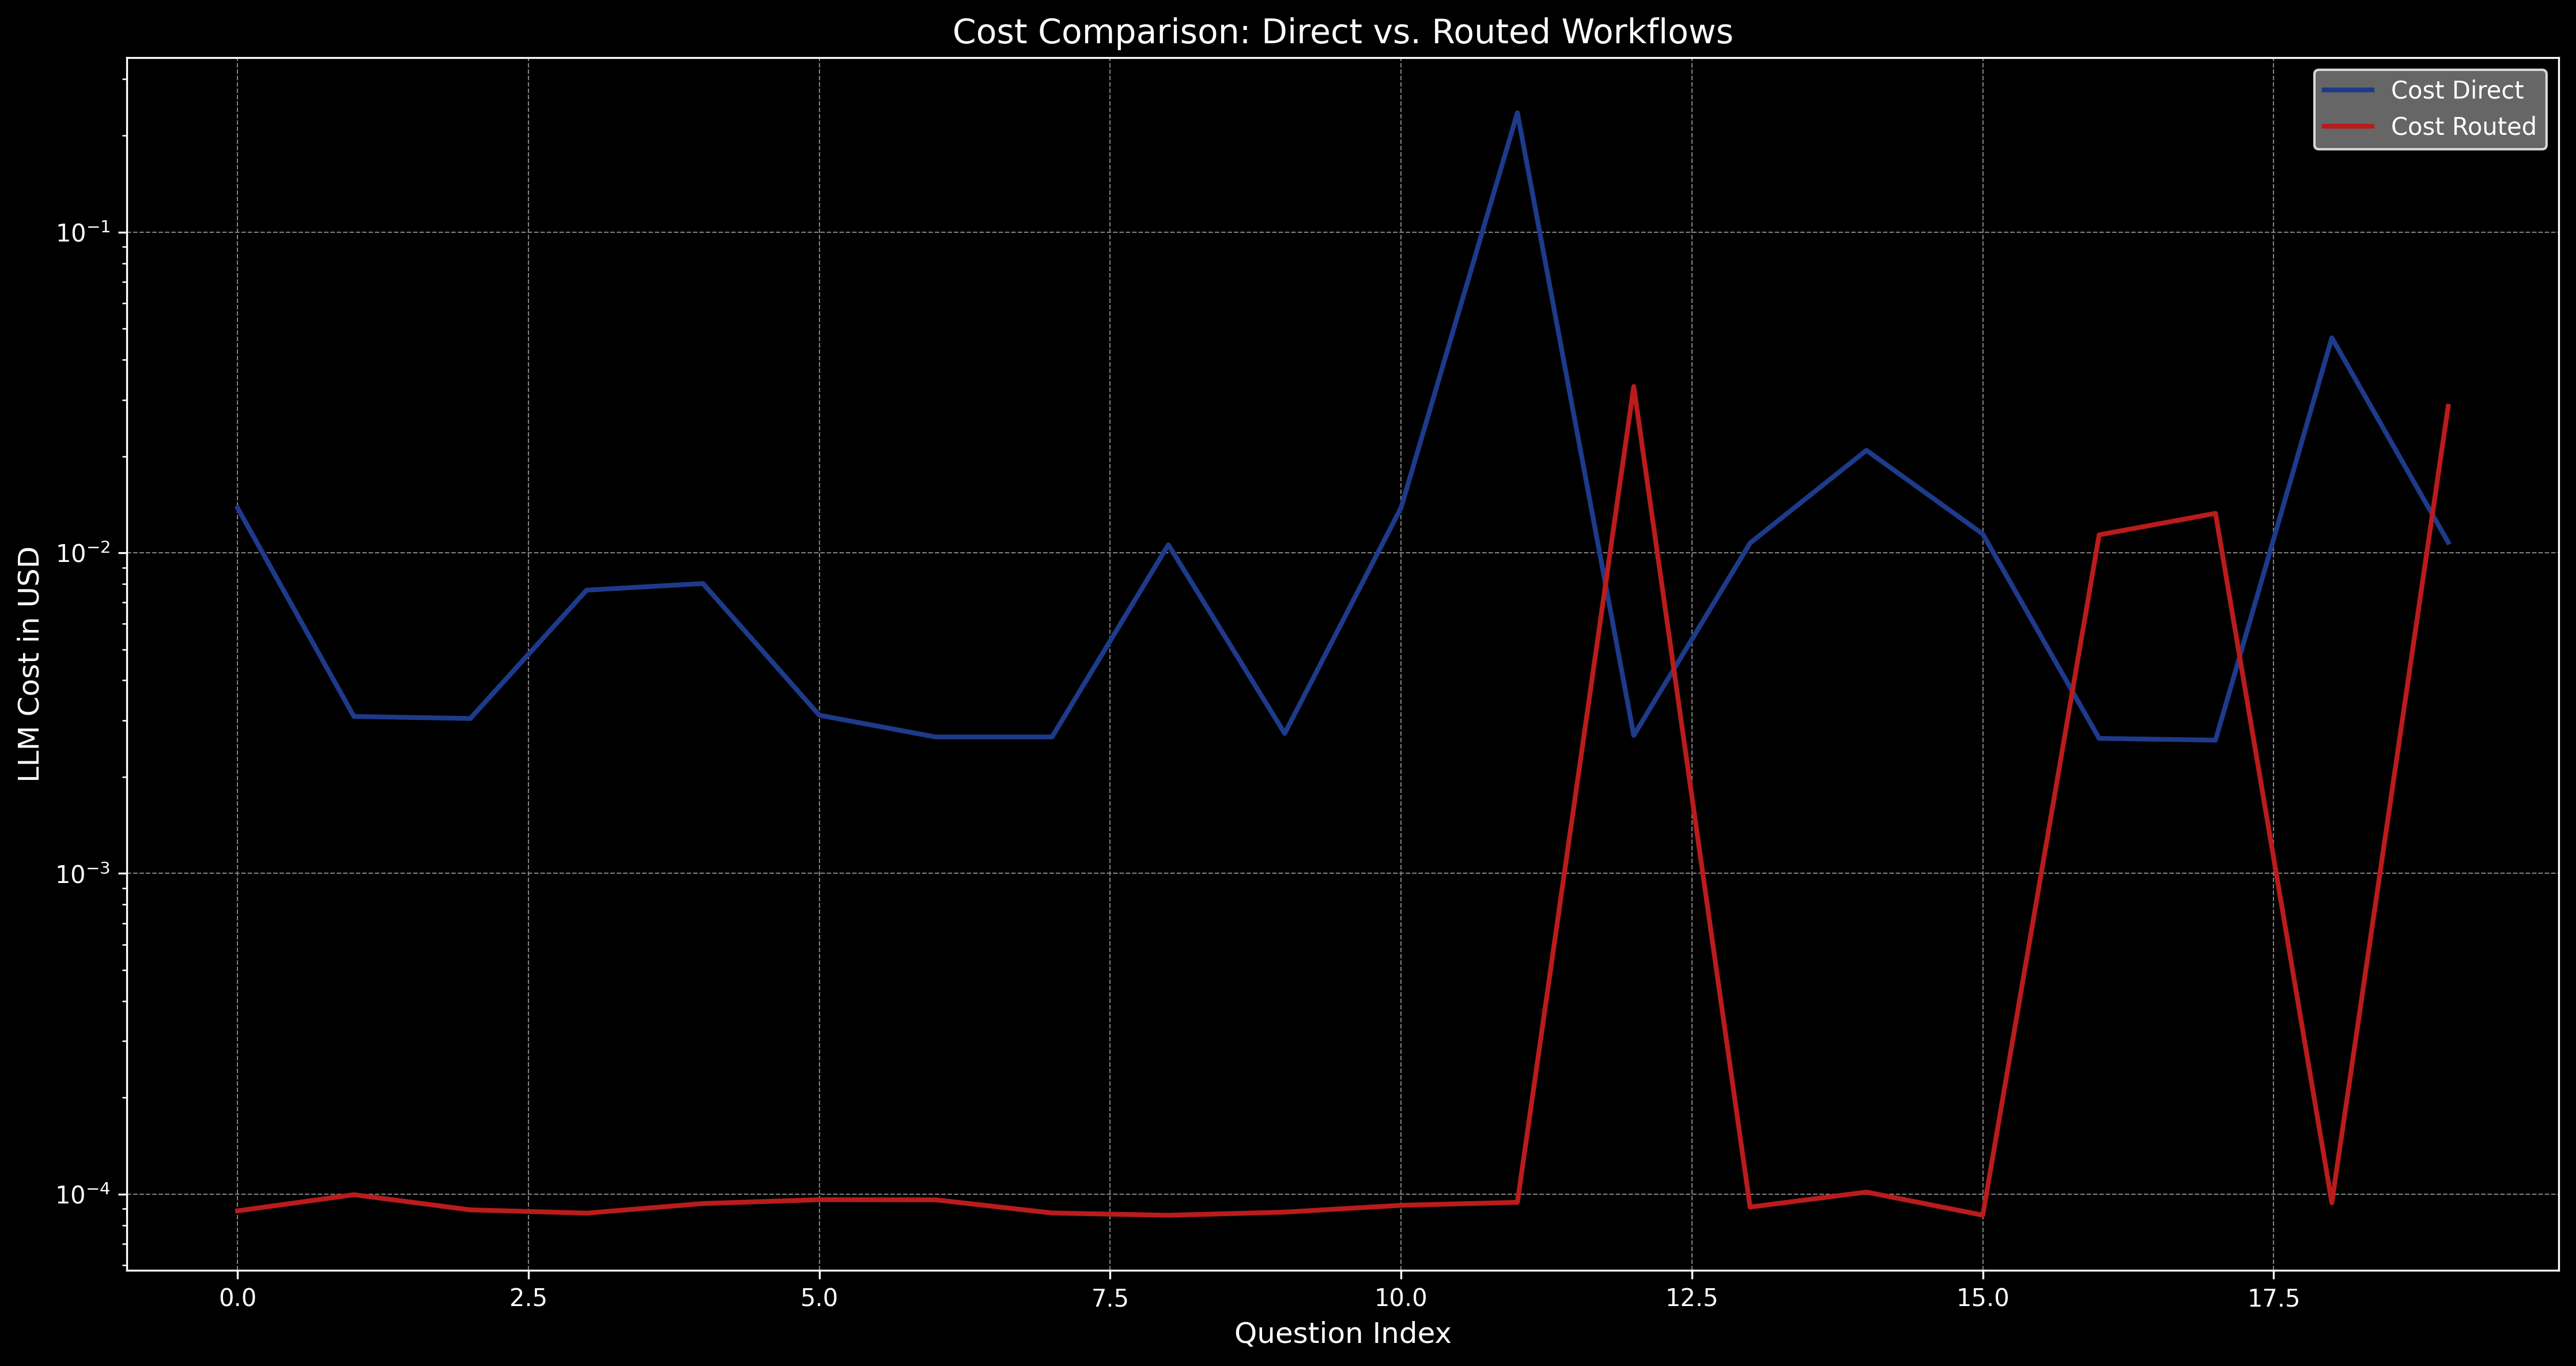

In [3]:
plot_cost_comparison_cover("./output20.csv")

In [5]:
y = calculate_total_costs("./output10.csv")
x = calculate_total_costs("./output20.csv")


Cost Analysis for output10.csv:
Total Direct Cost: $0.2085
Total Routed Cost: $0.1517
Cost Savings: $0.0568
Percentage Savings: 27.25%

Cost Analysis for output20.csv:
Total Direct Cost: $0.4154
Total Routed Cost: $0.0877
Cost Savings: $0.3277
Percentage Savings: 78.88%


In [9]:
compare_scores("output10.csv")

{'mean_single': 9.0,
 'mean_routed': 8.5,
 'avg_difference': -0.5,
 'times_routed_higher': 0,
 'times_single_higher': 4,
 'times_equal': 6,
 'min_difference': -2,
 'max_difference': 0}

In [10]:
compare_scores("output20.csv")

{'mean_single': 8.65,
 'mean_routed': 8.9,
 'avg_difference': 0.25,
 'times_routed_higher': 8,
 'times_single_higher': 3,
 'times_equal': 9,
 'min_difference': -2.0,
 'max_difference': 2.0}